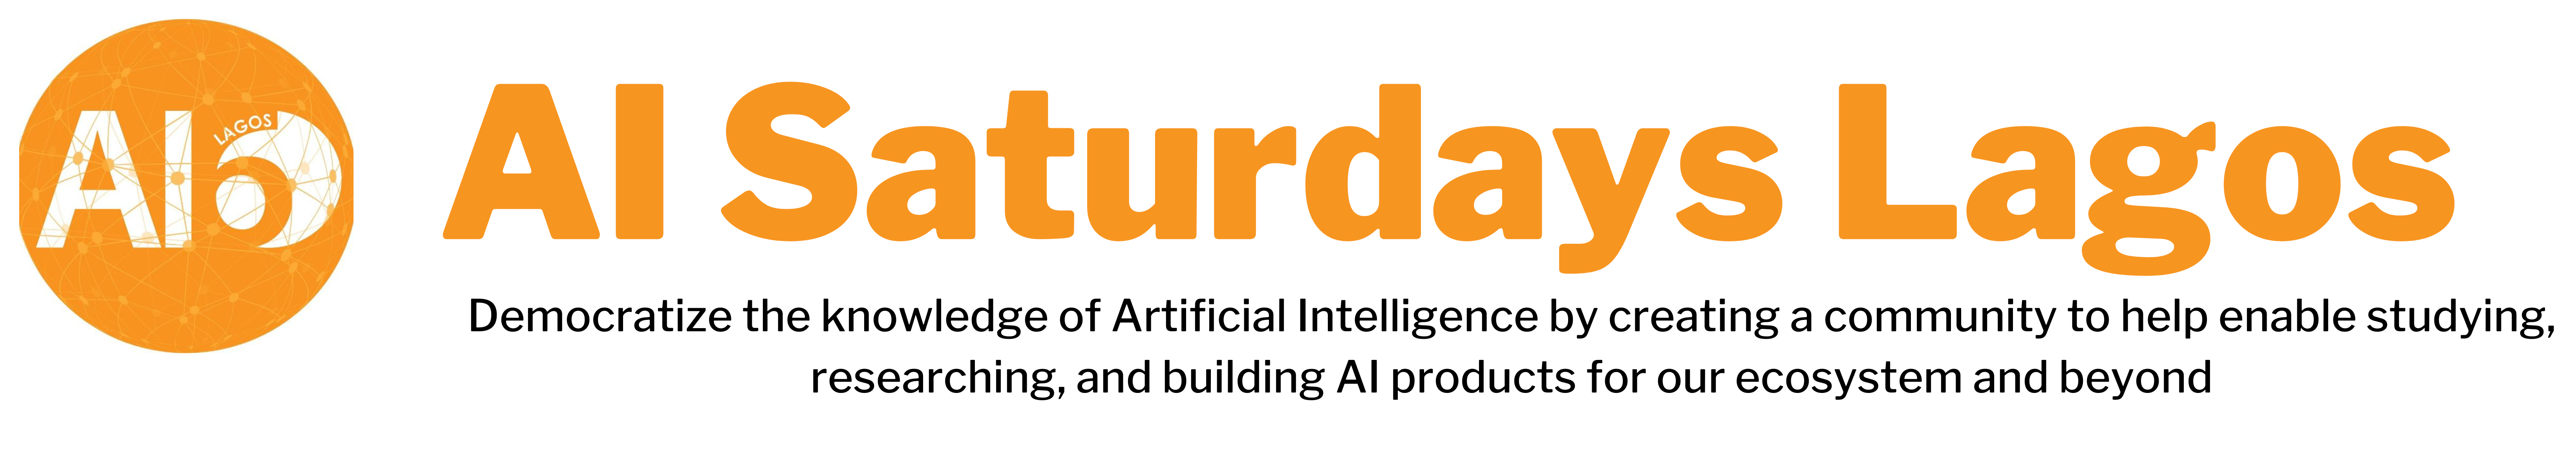

# Assignment Submission Details

* You are required to submit a completed copy of this notebook and a Medium article.
* Create a [Medium account](https://medium.com/) if you don't already have
* Data visualization is storytelling hence, you would need to write detailed article on Medium that tells the story of your Exploration and Visulization of the 2023 World Population Dataset.
* 70% of grades will be allocated to your written Medium article and 30% to your complete notebook analysis.
* Your Medium article should include the steps you took during this assignment and the insights you gained from the dataset.

We provide article template in subsection below. If you have any questions, make sure to drop them on discord, tagging your lab instructor.


**Deadline: 8th of October, 2023. 11:59pm WAT.**

## World Population by Country 2023 Dataset

This notebook uses the [2023 World Population](https://www.kaggle.com/datasets/joebeachcapital/world-population-by-country-2023) dataset available on Kaggle.

## Imports

In [ ]:
# TODO: Import any other modules you need e.g matplotlib, seaborn, plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# TODO: Read WorldPopulation2023.csv dataset into a well named dataframe
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eniolaadetunji","key":"80750ff4e2b9d173f8240ef3e3062c46"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          19139        589  1.0              
aemyjutt/diabetesdataanslysis                              DiabetesDataAnslysis                              9KB  2023-09-23 13:48:24           1038         27  1.0              
ghassenkhaled/video-games-data                             Video Games Data                                476KB  2023-09-27 16:39:07            486         22  1.0              
joebeachcapital/students-performance        

In [ ]:
!kaggle datasets download -d joebeachcapital/world-population-by-country-2023

  0% 0.00/8.04k [00:00<?, ?B/s]
100% 8.04k/8.04k [00:00<00:00, 20.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/world-population-by-country-2023.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv('WorldPopulation2023.csv')
data.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,N.A.,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %


## Data Dictionary


| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Country(or dependency)            | character | Country/Dependent Territories                                                      |
| Population (2023)       | numeric | Country's Population as at September 2023                                            |
| Yearly change         | character   | Yearly change in population over time in Percentage                                              |
| Net Change        | numeric   | Total yearly change                                           |
| Density           | numeric | Population Density in a unit area                                                       |
| Land Area       | numeric | Country's Land Area                                        |
| Migrants           | numeric | The number of people leaving a country compared to those entering the country. A negative value shows more people leave the country then those that come in.|
| Fert Rate          | numeric | Country's Fertility rate                                                       |
| Med Age | numeric | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Urban Pop%         | character | Percentage Population in the Urban areas                                 |
| World share%  | character | Percentage of the world's population the country's population covers.                                    |


## Exploratory Data Analysis (EDA)

### TODO:
* Use the `describe` and `info` methods on each of your dataframes.
* Check the `dtypes` for the columns in each dataframe.
* Check for missing values in each dataframe
* Check for duplicates
* Check for any other operations commonly used during EDA and perform it here

In [ ]:
data.describe()

,Rank,Population2023,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge
count,234.000000,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,2.340000e+02,233.000000,233.000000
mean,117.500000,3.437565e+07,3.000230e+05,477.414530,5.559568e+05,1.301282e+01,2.414163,31.309013
std,67.694165,1.373861e+08,1.001815e+06,2320.693692,1.691024e+06,1.698334e+05,1.155913,9.628386
min,1.000000,5.180000e+02,-2.957105e+06,0.000000,0.000000e+00,-9.104750e+05,0.800000,15.000000
25%,59.250000,4.696482e+05,2.360000e+02,38.250000,2.650000e+03,-9.776750e+03,1.600000,22.000000
50%,117.500000,5.643895e+06,2.860150e+04,96.500000,7.972000e+04,-5.000000e+02,2.000000,32.000000
75%,175.750000,2.324537e+07,2.236855e+05,242.000000,4.070800e+05,4.750000e+02,3.000000,40.000000
max,234.000000,1.428628e+09,1.145449e+07,24360.000000,1.637687e+07,1.784718e+06,6.700000,54.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


In [ ]:
# checking for data types
data.dtypes

Rank                int64
Country            object
Population2023      int64
YearlyChange       object
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%          object
WorldShare         object
dtype: object

In [ ]:
# checking for missing values
data.isna().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [ ]:
# checking for duplicates
data.duplicated().sum()

0

In [ ]:
# checking for the number of rows and columns
data.shape

(234, 12)

In [ ]:
# checking for the key values
data.keys()

Index(['Rank', 'Country', 'Population2023', 'YearlyChange', 'NetChange',
       'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate',
       'MedianAge', 'UrbanPop%', 'WorldShare'],
      dtype='object')

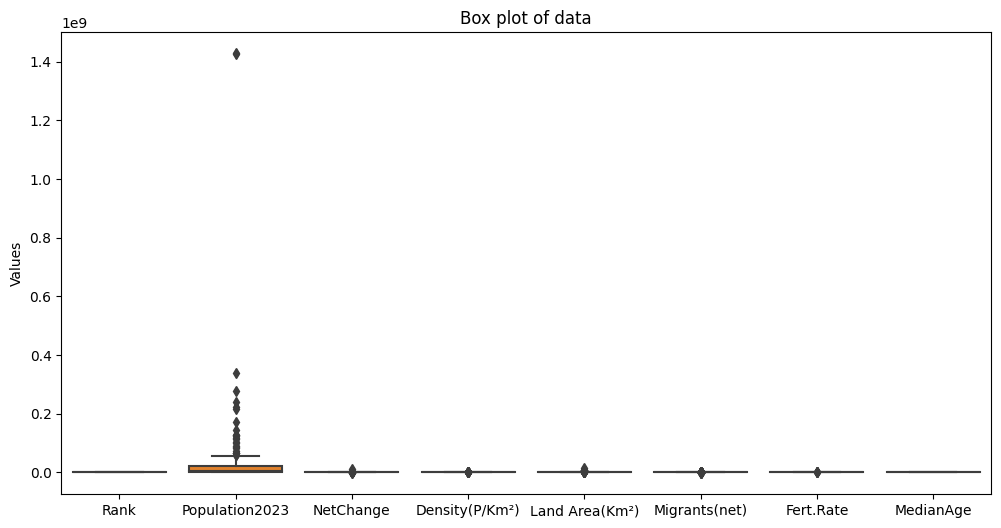

In [ ]:
# checking for outliers
plt.figure(figsize = (12,6))
sns.boxplot(data)
plt.title("Box plot of data")
plt.ylabel("Values")
plt.savefig('Box plot of data.png')
plt.show()

Population2023 has a few outliers

## Data Preprocessing and Cleaning

### TODO:
* Save the uncleaned copy of the dataframe
* Check of columns in the datasets that need cleaning like the `YearlyChange`, `WorldShare`, etc columns
* Handle Missing Data as you deem fit - [Pandas Missing Data Guide](https://pandas.pydata.org/docs/user_guide/missing_data.html)
* Correct the data types where necessary
* Create a `wrange_data` function that reads and cleans the data
* Make sure to include informative comments


In [ ]:
# saving the uncleaned copy

data.to_csv('uncleaned world population.csv')

In [ ]:
data.isna().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

From the data.head() result , we would observe that at Index 3 , in the urbanpop% column, there is  a N.A value which could be treated as NaN and could be present in the entire dataset. We should define custom null values that would contain posible representation of missing values as much as possible and replace it with the standard null values in pandas just to be sure the data is thoroughly cleaned  

In [ ]:
custom_nvalues = ['N.A.','NA','Not Applicable','Missing','N/A','N.A']

data.replace(custom_nvalues,np.nan,inplace = True)
data.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,NaN,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %


In [ ]:
data.isnull().sum()

Rank               0
Country            0
Population2023     0
YearlyChange       0
NetChange          0
Density(P/Km²)     0
Land Area(Km²)     0
Migrants(net)      0
Fert.Rate          1
MedianAge          1
UrbanPop%         18
WorldShare         0
dtype: int64

We would notice the null values in the Urbanpop% column


In [ ]:
# Let's handle the null values by filling up with the mode

null_columns = ['Fert.Rate','MedianAge','UrbanPop%']

for column in null_columns:
  mode = data[column].mode()[0]
  data[column].fillna(mode,inplace = True)

In [ ]:
data.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         0
UrbanPop%         0
WorldShare        0
dtype: int64

All null values have been taken care of

In [ ]:
# datatypes correction
data.dtypes

Rank                int64
Country            object
Population2023      int64
YearlyChange       object
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%          object
WorldShare         object
dtype: object

In [ ]:
# Columns such as UrbanPop, WorldShare and YearlyChange , the datatypes need to be changed and we can write a for loop for it as well
type_cols = ['UrbanPop%','WorldShare','YearlyChange']

for column in type_cols:
  data[column] = data[column].str.replace('%','').astype(float)

In [ ]:
data.dtypes

Rank                int64
Country            object
Population2023      int64
YearlyChange      float64
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%         float64
WorldShare        float64
dtype: object

In [ ]:
# creating the wrange function for data cleaning

def wrange_data(file_path,custom_null_values = None,column_data_types = None,drop_duplicates = False):
  data = pd.read_csv(file_path)
  '''The wrange_data function takes in for parameters: filepath, custom_null values,column_data_types and drop duplicates
  filepath(compulsory)- the path of the data to be cleaned must be provided for the function to work
  custom_null_values(optional)- custom null values should contain the representation of null values in the dataset
  column_data_types(optional)- The data types of columns should be passed in here
  drop_duplicates(optional)- If available, this parameter would drop duplicate values in the dataset'''

  if custom_null_values:
    data.replace(custom_null_values,np.nan,inplace = True)
  if column_data_types:
    for column, data_types in column_data_types.items():
      data[column] = data[column].astype(data_types)
  if drop_duplicates:
    data.drop_duplicates(inplace = True)
  for column in data.columns:
    data[column].fillna(data[column].mode()[0],inplace = True)

  return(data)

In [ ]:
# testing the function with a copy of the uncleaned data that I saved earlier
file_path = 'uncleaned world population.csv'
custom_null_values = ['N.A.','NA','Not Applicable','Missing','N/A','N.A']
column_data_types = ['int64','object','int64','float64','int64','int64','int64','int64','float64','float64','float64','float64']
cleaned_data = wrange_data(file_path,custom_null_values)

In [ ]:
cleaned_data.isna().sum()

Unnamed: 0        0
Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         0
UrbanPop%         0
WorldShare        0
dtype: int64

Handles missing data well


## Data Exploration and Visualization

### Insights:
* What are the top 10 most populated countries?
* What are the least 10 populated countries?
* Using an heatmap, visualize the correlation between the numeric features in the dataset i.e `data.corr(numeric_only=True)`
* What is the relationship between the following features:
    - Migrants vs. Population Density
    - Median Age and Yearly Change
    - Fertility Rate and Yearly Change
* Compulsorily include three more insights/questions to explore
* Your visualization must utilize as least 2 of the following visualization libraries; matplotlib, seaborn, plotly
* You must document your findings below every plot you make using markdown cells. See [Code and Markdown Cells in Jupyter Notebook](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/code-markdown-cells-in-jupyter-notebook/).
* Provide links to resources your made use of while resolving this tasks (at least 3)

In [ ]:
data.head()

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70,1111083,65,652860,-65846,4.4,17.0,26.0,0.53
1,138,Albania,2832439,-0.35,-9882,103,27400,-8000,1.4,38.0,67.0,0.04
2,34,Algeria,45606480,1.57,703255,19,2381740,-9999,2.8,28.0,75.0,0.57
3,212,American Samoa,43914,-0.81,-359,220,200,-790,2.2,29.0,67.0,0.00
4,202,Andorra,80088,0.33,264,170,470,200,1.1,43.0,85.0,0.00


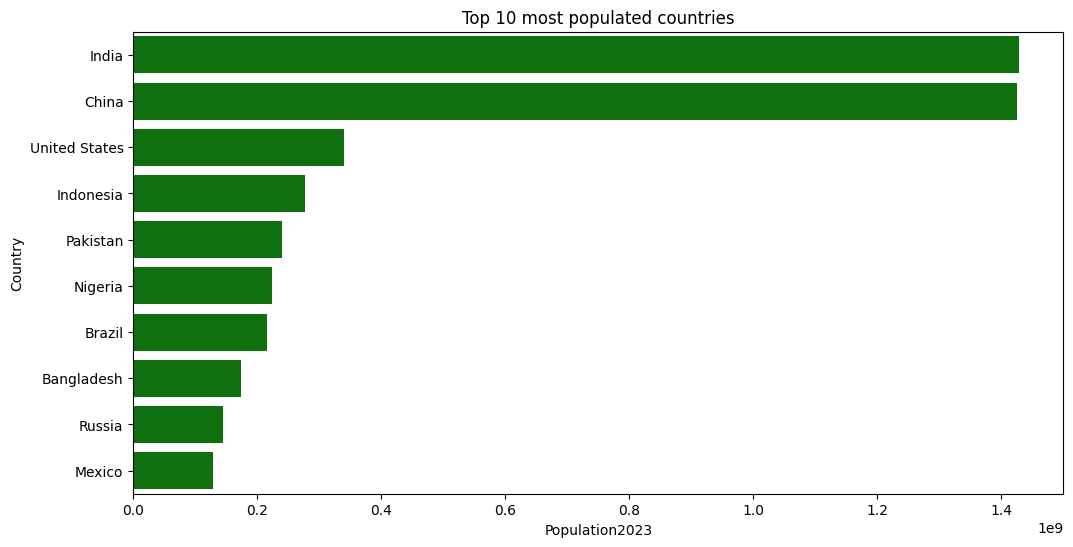

In [26]:
# Top 10 most populated countries
pop = data[['Country','Population2023']]
df_pop = pop.sort_values(by = 'Population2023',ascending = False )
top_10 = df_pop.head(10)
top_10

plt.figure(figsize = (12,6))
sns.barplot(data = top_10 , x = 'Population2023',y = 'Country',color = 'Green')
plt.title('Top 10 most populated countries')
plt.savefig('Top 10 most populated countries.png')
plt.show()

*The top 10 countries by population are India, China, United States, Indonesia, Pakistan, Nigeria, Brazil , Bangladesh, Russia and Mexico*

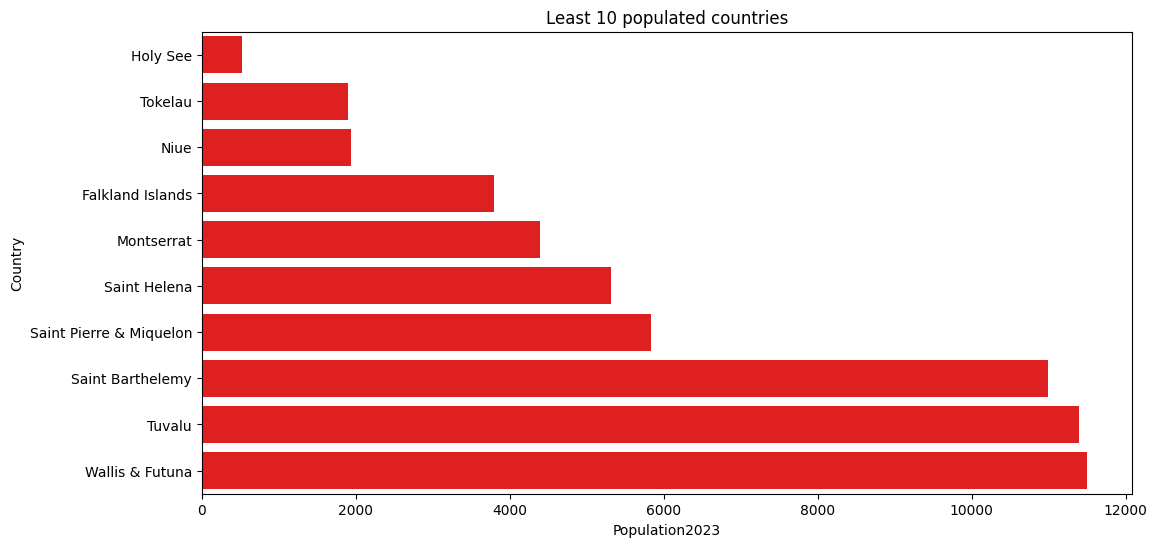

In [29]:
# Least 10 populated countries
pop = data[['Country','Population2023']]
df_pop = pop.sort_values(by = 'Population2023',ascending = True )
least_10 = df_pop.head(10)
least_10

plt.figure(figsize = (12,6))
sns.barplot(data = least_10 , x = 'Population2023',y = 'Country',color = 'Red')
plt.title('Least 10 populated countries')
plt.savefig('Least 10 populated countries.png')
plt.show()

*The least 10 countries by population include Holy see ,Tokelau , Niue , Falkland Islands, Monserrat , Saint Helena , Saint Pierre & Miquelon , Saint Barthelemy, Tuvalu and Wallis & Futuna*

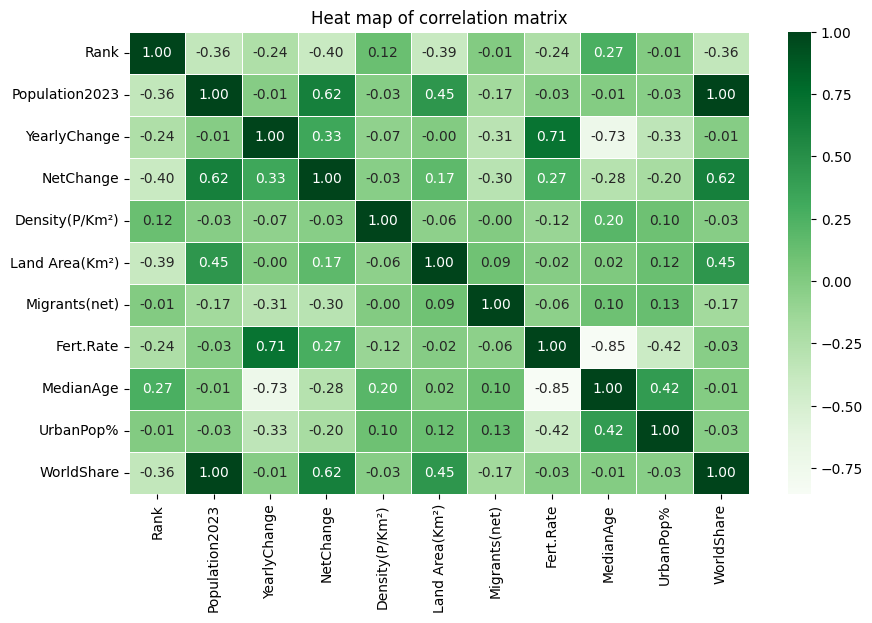

In [ ]:
correlation_matrix = data.corr(numeric_only = True)
correlation_matrix

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Heat map of correlation matrix')
plt.savefig('Heat map of correlation matrix')
plt.show()

In the correlation matrix above , values ranging from 0.5 to 1 have a correlation while values from 0.5-0.1 are slightly correlated .
Values with 0.00 or -0-00 have no correlation while negative values mean that the columns are negatively correlated or inversely proportional

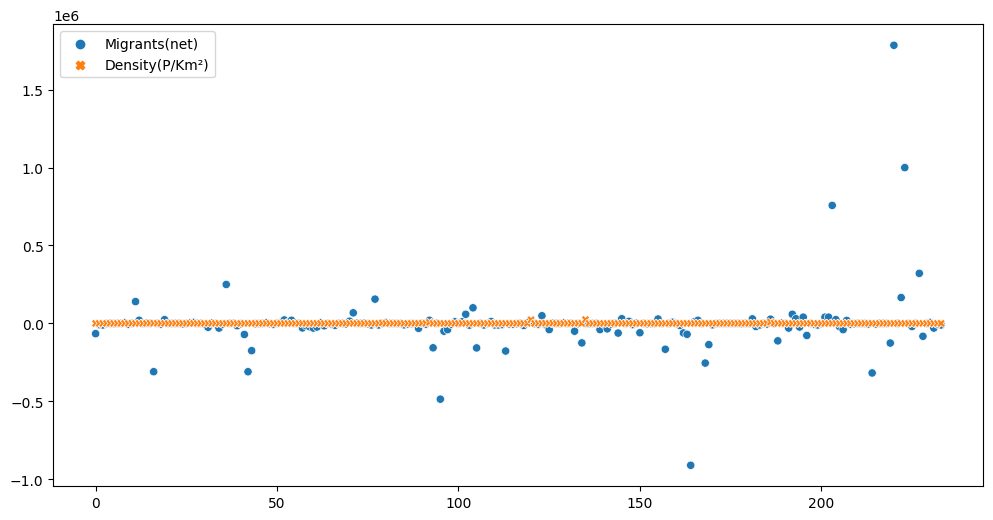

"From the correlation matrix above , the correlation between these two data points is -0.00 which means there's little or no correlation between them. i.e the two col\numns are not affected by one another "

In [ ]:
# relationship between migrants and population density (By visualisation and correlation)

plt.figure(figsize = (12,6))
mpd = data[['Migrants(net)','Density(P/Km²)']]
sns.scatterplot(data = mpd)
plt.show()
'''From the correlation matrix above , the correlation between these two data points is -0.00 which means there's little or no correlation between them. i.e the two col
umns are not affected by one another '''


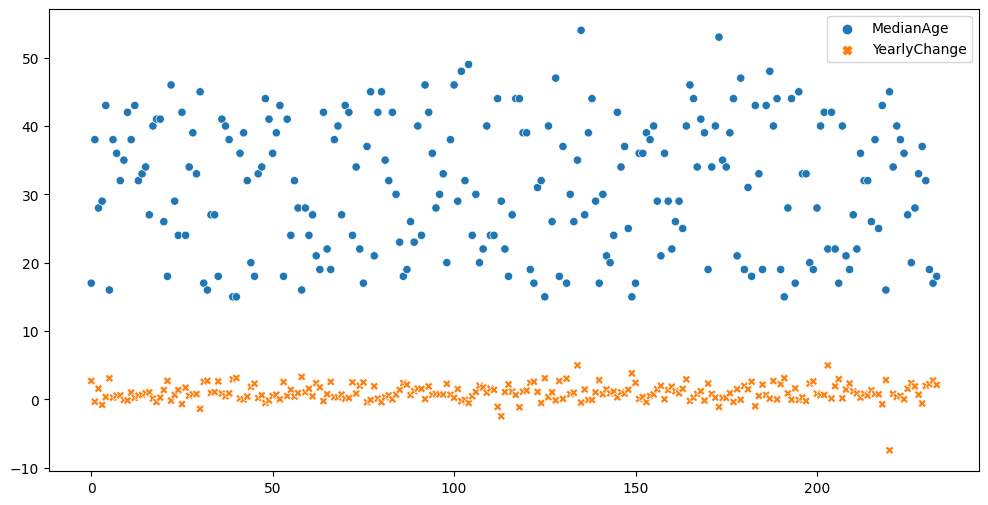

"From the correlation matrix above , the correlation between these two data points is -0.73. There is a negative correlation between the two columns i.e as one increases,\nthere's a corresponding decrease in the other"

In [ ]:
# relationship between median age  and Yearly change(By visualisation and correlation)

plt.figure(figsize = (12,6))
m_yc = data[['MedianAge','YearlyChange']]
sns.scatterplot(data = m_yc)
plt.show()
'''From the correlation matrix above , the correlation between these two data points is -0.73. There is a negative correlation between the two columns i.e as one increases,
there's a corresponding decrease in the other'''

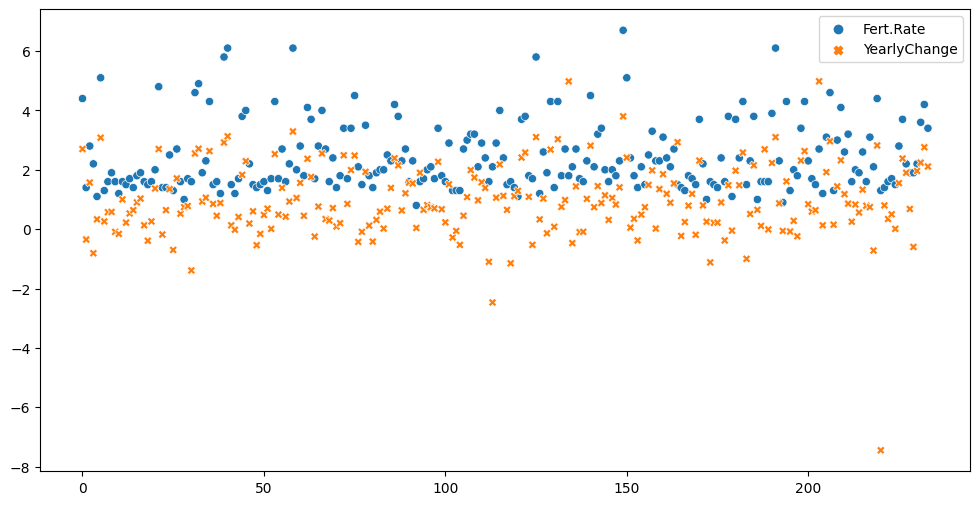

'From the correlation matrix above , the correlation between these two data points is 0.71. There is a positive correlation between the two columns. i.e as one increases, there\nis a corresponding increase in the other '

In [ ]:
# relationship between median age  and Yearly change(By visualisation and correlation)

plt.figure(figsize = (12,6))
f_yc = data[['Fert.Rate','YearlyChange']]
sns.scatterplot(data = f_yc)
plt.show()
'''From the correlation matrix above , the correlation between these two data points is 0.71. There is a positive correlation between the two columns. i.e as one increases, there
is a corresponding increase in the other '''

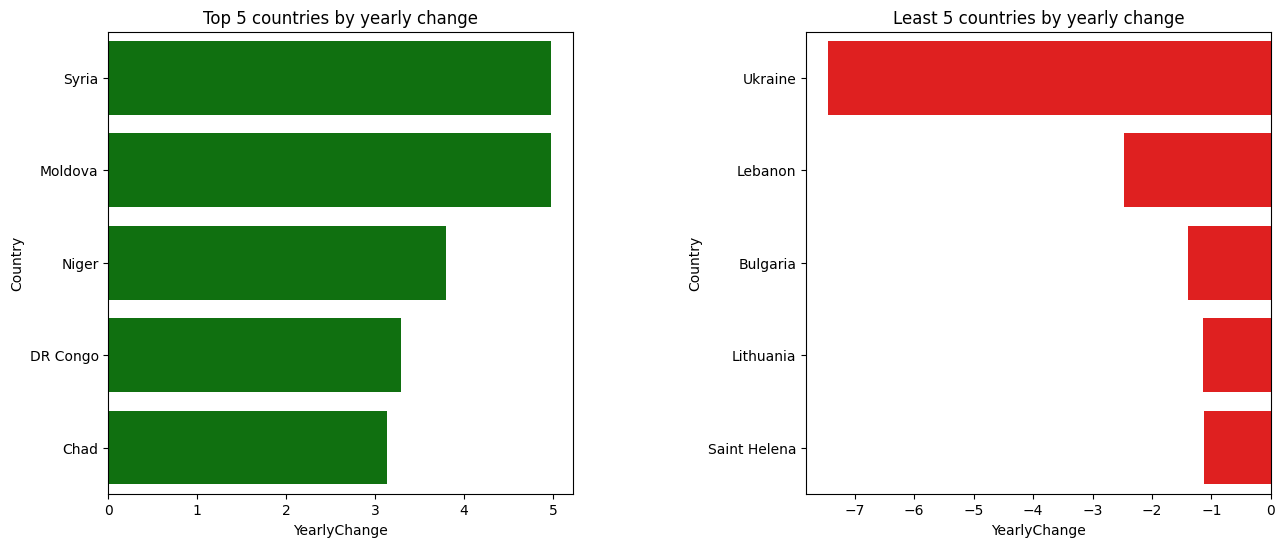

In [ ]:
# Top 5 countries by yearly change and least 5 countries by yearly change
yc1 = data[['Country','YearlyChange']]
df_yc1 = yc1.sort_values(by = 'YearlyChange',ascending = False )
top_5 = df_yc1.head(5)
top_5


df_yc2 = yc1.sort_values(by = 'YearlyChange',ascending = True )
least_5 = df_yc2.head(5)
least_5

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(data = top_5 , x = 'YearlyChange',y = 'Country',color = 'Green')
plt.title('Top 5 countries by yearly change')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)

plt.subplot(1,2,2)
sns.barplot(data = least_5 , x = 'YearlyChange',y = 'Country',color = 'Red')
plt.title('Least 5 countries by yearly change')
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.savefig('Top 5 countries by yearly change')
plt.savefig('Least 5 countries by yearly change')
plt.show()

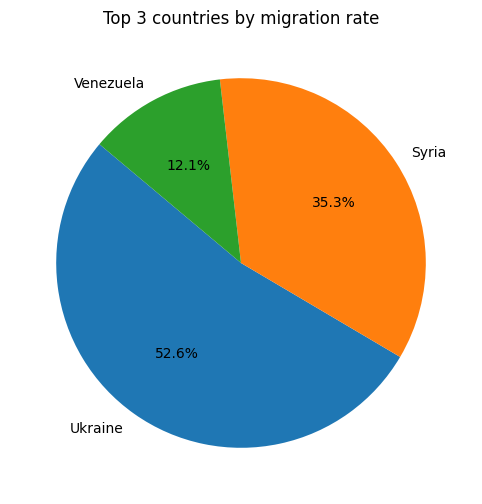

In [ ]:
# which countries have the highest migration rates (top 3)
data['Migration rate'] = data['Migrants(net)']/data['Population2023']*1000
c_mr1 = data[['Country','Migration rate']]
t_mr = c_mr1.sort_values(by = 'Migration rate',ascending=False)
top_3 = t_mr.head(3)


top_3_countries = top_3['Country'].tolist()
top_3_migration_rates = top_3['Migration rate'].tolist()

plt.figure(figsize=(8,6))
plt.pie( top_3_migration_rates, labels = top_3_countries,autopct='%1.1f%%', startangle=140)
plt.title('Top 3 countries by migration rate')
plt.savefig('Top 3 countries by migration rate.png')
plt.show()

Ukraine has the highest migration rate followed by syria then Venezuela

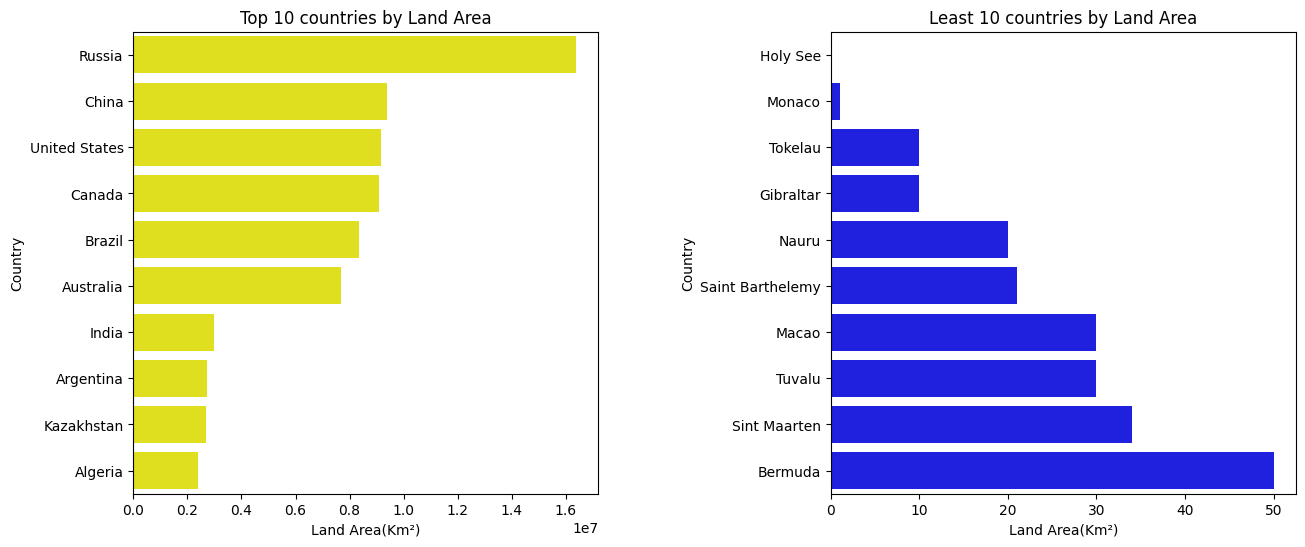

In [ ]:

Land_a = data[['Country','Land Area(Km²)']]
top_land_a = Land_a.sort_values(by = 'Land Area(Km²)', ascending = False)
top_10_la = top_land_a.head(10)
top_10_la

top_land_a = Land_a.sort_values(by = 'Land Area(Km²)', ascending = True)
least_10_la = top_land_a.head(10)
least_10_la



plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data = top_10_la,x = 'Land Area(Km²)',y = 'Country',color = 'Yellow')
plt.title('Top 10 countries by Land Area')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)


plt.subplot(1,2,2)
sns.barplot(data =least_10_la,x = 'Land Area(Km²)',y = 'Country',color = 'Blue')
plt.title('Least 10 countries by Land Area')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

plt.savefig('Least 10 countries by Land Area.png')


plt.show()


From the analysis the table below shows the top 10 and least 10 contries by land area

| Top 10    |  Least 10 |
|--------  | -------- |
|1 Russia| Holy See  |
|2 China| Monaco  |
|3 United States| Tokelau|
|4 Canada| Gibraltar|
|5 Brazil| Nauru|
|6 Australia| Saint Barthelemy|
|7 India| Macao|
|8 Argentina| Tuvalu|
|9 Kazakhstan| Sint Maarten|
|10 Algeria| Bermuda|

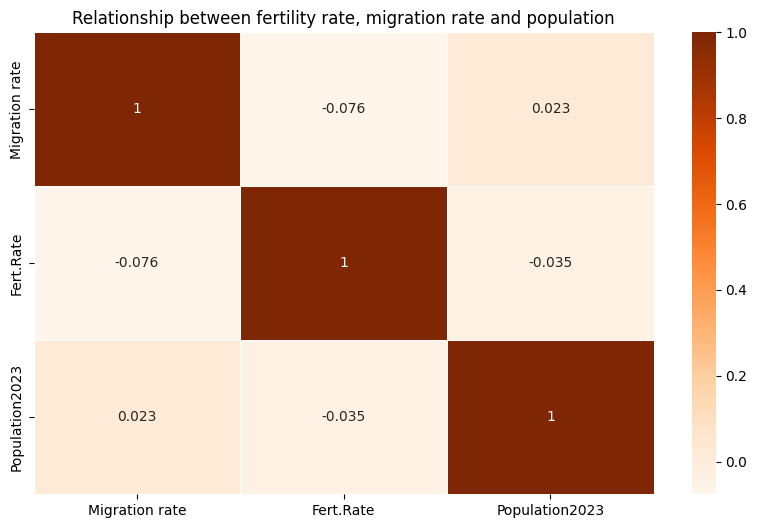

In [ ]:
# correlation between Migration rate , Fertility rate and the population

corr_mat = data[['Migration rate','Fert.Rate','Population2023']].corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_mat, annot = True, cmap = 'Oranges',linewidths=0.5)
plt.title('Relationship between fertility rate, migration rate and population')
plt.savefig('Relationship between fertility rate, migration rate and population.png')
plt.show()

From the heat map above , Migration rate has little and positive correlation with the population while fertility rate is negatively correlated with population

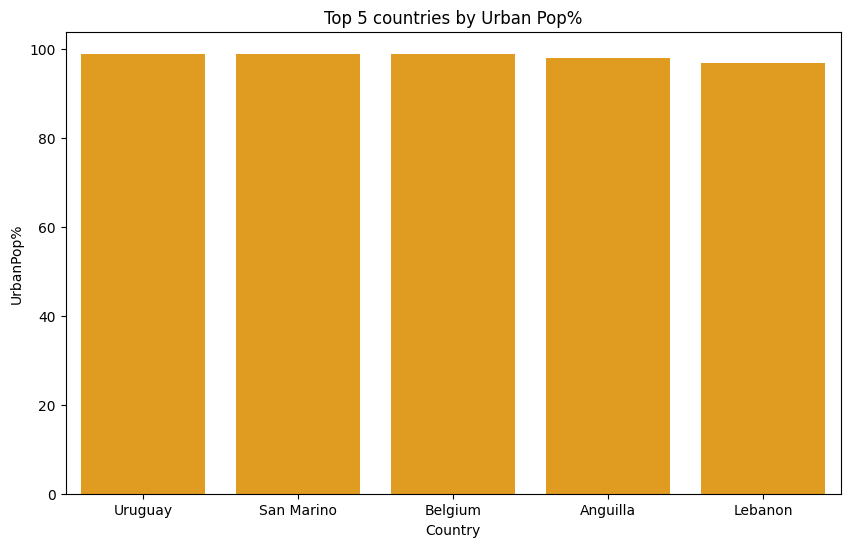

In [ ]:
# Top 5 countries by Urban Pop%
ur_p = data[['Country','UrbanPop%']]
s_up = ur_p.sort_values(by = 'UrbanPop%',ascending = False)
top5 = s_up.head()

plt.figure(figsize=(10,6))
sns.barplot(data = top5, x = 'Country',y = 'UrbanPop%',color = 'Orange')
plt.title('Top 5 countries by Urban Pop%')
plt.savefig('Top 5 countries by Urban Pop%.png')
plt.show()


In [ ]:
# Average population of the world

mean_pop = data['Population2023'].mean()
print ('The average population of the world as at 2023 is:' ,mean_pop)

The average population of the world as at 2023 is: 34375647.876068376


### TODO
* Include 3 or 4 of your observations in the `Comments` below after exploring and visualizing the dataset

### Comments
- India has the  highest population has lower land area compared to the population and as such may be overpopulated

- Ukraine experiences the most decrease in population by year and the highest migration rate

- Fertility rate has little or no relationship with the population

- On an average, there are about 34 million people in the world

## Article Template

* You can use this template for you articles or create a more interesting structure for your article. This only serves as a guideline.
* You can be as creative as you want to be, you need to make your story appealing.


### **Possible Title: Exploring Global Population Trends in 2023**
(free free to use any title you find befitting)

### Introduction
* Begin with mentioning that the article is in response to your assignment requirement for AI Saturdays Lagos Cohort 8, focusing on the Data Visualization and Exploration lecture and lab. Link the [cohort structure](https://github.com/AISaturdaysLagos/cohort_structure/tree/main) page.
* Provide a brief introduction to the dataset used, mentioning the source and context.
* Explain the importance of understanding global population trends and why the dataset is relevant.
* Mention the tools and libraries you depended on during this Exploration
  
### Data Exploration
#### Dataset Overview
* Describe the dataset used for analysis, including the columns and their meanings.
* Discuss the size of the dataset, the number of features, and any initial observations.
  
#### Exploratory Data Analysis (EDA)
* Share the steps taken during EDA, including the use of describe and info methods.
* Mention any interesting patterns or statistics discovered during this phase.
  
#### Data Preprocessing and Cleaning
* Explain the process of data cleaning, including handling missing values and correcting data types.
* Describe the wrangle_data function and its role in preparing the data for analysis.
  
### Data Visualization
#### Top 10 Most Populated Countries
* Present the top 10 most populated countries using an appropriate visualization (e.g., bar chart).
* Provide insights into these countries and their populations.
  
#### Least 10 Populated Countries
* Display the least 10 populated countries using an appropriate visualization.
* Discuss the characteristics of these countries.
  
#### Correlation Analysis
* Use a heatmap to visualize the correlation between numeric features.
* Interpret the findings and identify any significant relationships.
  
#### Relationships Between Features
* Explore and visualize relationships between specific features (e.g., Migrants vs. Population Density).
* Share insights gained from these visualizations.
  
#### Additional Insights
* Include three or four more insights or questions explored during the analysis.
* Describe the visualizations used and the conclusions drawn.
  
#### Conclusion
* Summarize the key findings and insights obtained from the analysis.
* Discuss the importance of data visualization in storytelling and conveying information effectively.
* Reflect on the overall experience and what was learned during the assignment.
  
#### Article Resources
* Provide links to resources, articles, or documentation that helped in completing the assignment.
* Encourage readers to explore these resources for further learning.
  
#### Acknowledgments
* If relevant, acknowledge any assistance or guidance received during the assignment.
* Acknowledge your instructor and tutor for the Data Visualization and Exploration class.
* Acknowledge the AI Saturdays Lagos Cohort 8 organization team.

  
#### About the Author
* Briefly introduce yourself and your background. Mention how people can stay in touch with you & your work.
* Mention your motivation for the assignment and your interest in data science.

#### Feedback
* Encourage feedback and comments from readers.

[Towards Data Science om Medium](https://towardsdatascience.com/) has a numerous articles that can serve as inspiration for your work.

Good luck with your assignment! If you have any questions, feel free to ask.
